### SMOTE (Synthetic Minority Over-sampling Technique)


Evaluation for Refined Random Forest Model (with SMOTE)
Classification Report:
              precision    recall  f1-score   support

        Stay       0.82      0.93      0.87       388
       Leave       0.53      0.29      0.38       112

    accuracy                           0.78       500
   macro avg       0.68      0.61      0.62       500
weighted avg       0.76      0.78      0.76       500


Top 10 Most Important Features for Attrition Prediction 
                    feature  importance
12    CultureAlignmentScore    0.111426
1              TenureMonths    0.090068
13          SalaryPerTenure    0.072385
9          DistanceFromHome    0.064640
4                 SalaryUSD    0.063495
0                       Age    0.061641
11     JobSatisfactionScore    0.058510
3           EngagementScore    0.055261
6   YearsSinceLastPromotion    0.054640
7           WorkLifeBalance    0.051212


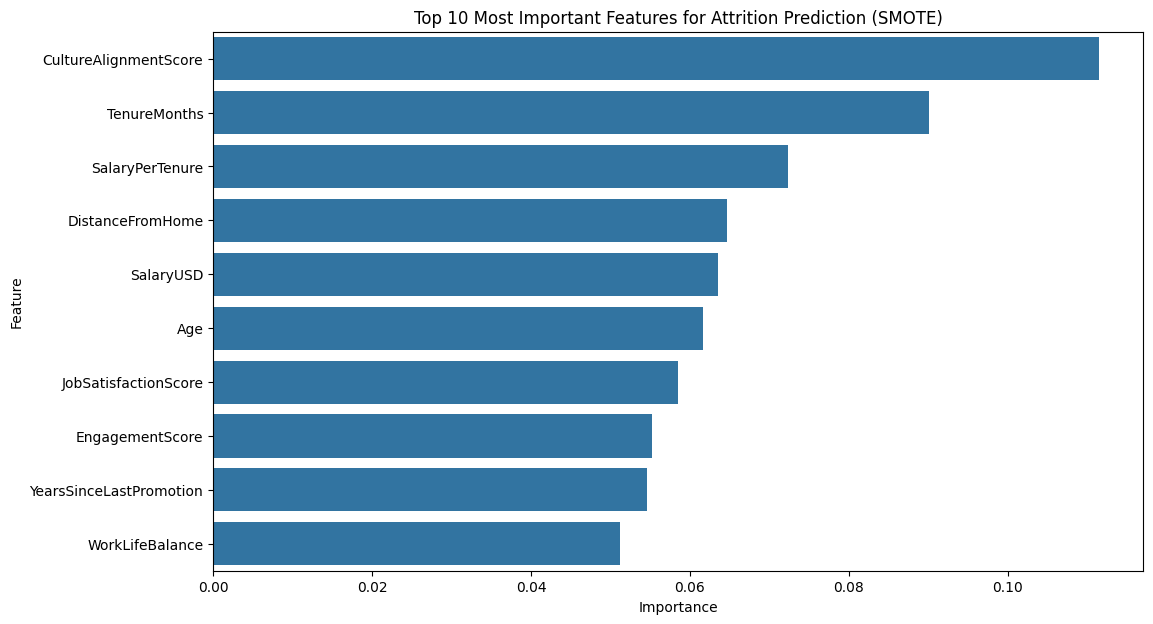

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data again for continuity
df = pd.read_csv('synthetic_hr_data.csv')
imputer = SimpleImputer(strategy='median')
numerical_cols_to_impute = ['PerformanceRating', 'EngagementScore', 'JobSatisfactionScore', 'WorkLifeBalance']
df[numerical_cols_to_impute] = imputer.fit_transform(df[numerical_cols_to_impute])
df['SalaryPerTenure'] = df['SalaryUSD'] / (df['TenureMonths'] + 1)
df = df.drop('EmployeeID', axis=1)
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
X = df.drop('Attrition', axis=1)
y = df['Attrition']
le = LabelEncoder()
y = le.fit_transform(y)
nominal_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=nominal_cols, drop_first=True)
scaler = StandardScaler()
numerical_features = X_encoded.select_dtypes(include=np.number).columns
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier on the balanced data
rf_clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_clf_smote.predict(X_test)

# Extract and Print Feature Importance
print("\nEvaluation for Refined Random Forest Model (with SMOTE)")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_smote, target_names=['Stay', 'Leave']))

print("\nTop 10 Most Important Features for Attrition Prediction ")
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_clf_smote.feature_importances_
}).sort_values(by='importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(10))

# Plotting the feature importance
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Most Important Features for Attrition Prediction (SMOTE)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Model | Attrition Recall (Leave) |	Attrition Precision (Leave)	| Attrition F1-Score (Leave)

### Logistic Regression	| 8% |	56%	| 14%

### Initial Random Forest |	14%	| 55% | 23%

### Refined Random Forest (SMOTE) |	29% |	53%	| 38%

### ----------------------------------- Key Recommendations --------------------------------------------------------

Based on the refined predictive model and its feature importance analysis, here are the top three actionable recommendations to proactively address and reduce employee attrition.

**1. Focus on Culture and Employee Satisfaction**
The model identifies CultureAlignmentScore as the single most important feature, highlighting the critical role of company culture in retention. JobSatisfactionScore and EngagementScore are also highly influential.

- **Actionable Step:** Implement a Culture & Engagement Pulse Survey to regularly measure these scores, especially for new hires (at 30, 60, and 90 days). Use this data to identify employees who may not be feeling a connection to Tabby's values and mission.

- **Recommendation:** Pair at-risk employees with senior mentors who can provide guidance and help them better integrate into the company's culture. This human-centered approach can make a significant difference.

**2. Proactively Manage Compensation and Career Growth**
The data shows that compensation, both in terms of absolute salary (SalaryUSD) and growth over time (SalaryPerTenure), is a major factor in attrition. The time since an employee's last promotion also plays a significant role.

- **Actionable Step:** Establish a Proactive Compensation Review program. Flag employees who have gone more than 18 months without a promotion or a significant salary increase, particularly those with a high performance rating. This ensures that Tabby remains competitive and that employees feel their contributions are valued.

- **Recommendation:** Formalize career pathing within departments. Clearly communicate what's needed for an employee to advance and define the steps they should take to get there. This visibility can reduce feelings of stagnation.

**3. Prioritize Employee Well-being and Work-Life Integration**
Features like TenureMonths, DistanceFromHome, and WorkLifeBalance reveal that employees leave for reasons related to burnout, life changes, and overall well-being.

- **Actionable Step:** The high importance of TenureMonths and WorkLifeBalance suggests a need for targeted interventions at key milestones. Consider implementing "stay interviews" at the 1-year and 3-year marks to understand an employee's long-term goals and satisfaction.

- **Recommendation:** Continue to champion Tabby's flexible and remote work policies, as the importance of DistanceFromHome indicates that long commutes or time away from home are significant stressors. Leaders should be trained to actively encourage work-life balance and monitor team members for signs of burnout.